In [ ]:
 !nvidia-smi

Thu May 19 22:01:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset, DataLoader, Subset
# from torchvision.datasets import ImageFolder
from PIL import Image

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from keras import backend as K
from keras.callbacks import History 

from keras.layers import AveragePooling2D
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
import tensorflow as tf

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'datasci-kalampree'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

!apt -qq update

!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  81838      0 --:--:-- --:--:-- --:--:-- 84566
OK
47 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.41.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.


In [ ]:
!mkdir colab_directory

!gcsfuse --implicit-dirs datasci-kalampree colab_directory

mkdir: cannot create directory ‘colab_directory’: File exists
2022/05/19 18:47:29.299619 Start gcsfuse/0.41.1 (Go version go1.17.6) for app "" using mount point: /content/colab_directory
2022/05/19 18:47:29.312807 Opening GCS connection...
^C


In [ ]:
 !pip install gdown

In [ ]:
!mkdir bkk_radar_images_all

In [ ]:
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_1.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_2.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_3.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_4.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_5.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_6.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_7.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_8.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_9.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_10.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_11.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_12.zip" -d "/content/bkk_radar_images_all/"
!unzip "/content/drive/Shareddrives/Datasci/bkk_radar_images/bkk_radar_images_13.zip" -d "/content/bkk_radar_images_all/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622777542.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622778148.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622778434.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622779338.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622780250.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622780848.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622781134.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622781740.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622782042.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622782936.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/1622784150.png  
  inflating: /content/bkk_radar_images_all/bkk_radar_images_13/162278

In [ ]:
from distutils.dir_util import copy_tree
for i in range(2,14):
  copy_tree(f"/content/bkk_radar_images_all/bkk_radar_images_{i}", "/content/bkk_radar_images_all")

# Dataset

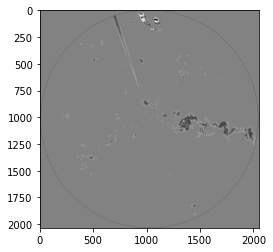

In [ ]:
img = cv2.imread(f"/content/bkk_radar_images_all/bkk_radar_images_1/1592463902.png",0)
# img = cv2.resize(img, (202,202)) 
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
def Scaler(array):
    return np.log(array+0.01)


def invScaler(array):
    return np.exp(array) - 0.01


def pad_to_shape(array, from_shape=900, to_shape=928, how="mirror"):
    # calculate how much to pad in respect with native resolution
    padding = int( (to_shape - from_shape) / 2)
    # for input shape as (batch, W, H, channels)
    if how == "zero":
        array_padded = np.pad(array, ((0,0),(padding,padding),(padding,padding),(0,0)), mode="constant", constant_values=0)
    elif how == "mirror":
        array_padded = np.pad(array, ((0,0),(padding,padding),(padding,padding),(0,0)), mode="reflect")
    return array_padded


def pred_to_rad(pred, from_shape=928, to_shape=900):
    # pred shape 12,928,928
    padding = int( (from_shape - to_shape) / 2)
    return pred[::, padding:padding+to_shape, padding:padding+to_shape].copy()


def data_preprocessing(X):
    
    # 0. Right shape for batch
    X = np.moveaxis(X, 0, -1)
    X = X[np.newaxis, ::, ::, ::]
    # 1. To log scale
    X = Scaler(X)
    # 2. from 900x900 to 928x928
    X = pad_to_shape(X)
    
    return X


def data_postprocessing(nwcst):
    
    # 0. Squeeze empty dimensions
    nwcst = np.squeeze(np.array(nwcst))
    # 1. Convert back to rainfall depth
    nwcst = invScaler(nwcst)
    # 2. Convert from 928x928 back to 900x900
    # nwcst = pred_to_rad(nwcst)
    # 3. Return only positive values
    nwcst = np.where(nwcst>0, nwcst, 0)
    return nwcst

def prediction(model_instance, input_data, lead_time=12):
    
    input_data = data_preprocessing(input_data)
    
    nwcst = []

    for _ in range(lead_time):
        # make prediction
        pred = model_instance.predict(input_data)
        # append prediction to holder
        nwcst.append(pred)
        # append prediction to the input shifted on one step ahead
        input_data = np.concatenate([input_data[::, ::, ::, 1:], pred], axis=-1)
    
    nwcst = data_postprocessing(nwcst)
    
    return nwcst

In [ ]:
class RainDataset(tf.keras.utils.Sequence):
    """Rain dataset."""

    def __init__(self,  root_dir,csv_path, step_in=4,step_out=4,batch_size=1,transform=None):

        df = df = pd.read_csv(csv_path,header=None,delimiter=',')
        image_names = []
        for i in range(df.shape[1]):
          image_names.append(df.iloc[0][i].strip("'"))
        self.total_imgs = image_names
        self.root_dir = root_dir
        self.transform = transform        
        self.step_in = step_in
        self.step_out = step_out
        self.batch_size = batch_size
        self.raw_images = []
        for i in range(len(self.total_imgs)):
          name = self.total_imgs[i]
          img = cv2.imread(f"{self.root_dir}/{name}",0)
          # print(f"{self.root_dir}/{name}")
          img = cv2.resize(img, (300,300)) 
          img = img.astype('float32')
          img = img /255
          print(f"{name} is appended")
          self.raw_images.append(img)

    def __len__(self):
        return (len(self.total_imgs) - (self.step_in + self.step_out))//self.batch_size

    def get_index(self,idx):
        tmp_imgs = []
        tmp_batch = []
          
            
        tmp_imgs = self.raw_images[idx:idx+self.step_in+self.step_out]
            
              
        # img = np.array(Image.open(os.path.join(self.root_dir,name)).convert('RGB').resize((400,400)))
        # img = cv2.imread(os.path.join(self.root_dir,name),0)
        # img = cv2.resize(img, (100,100))
        # print(img.shape)
        # print(idx)
        tmp_imgs = np.array(tmp_imgs)
        tmp_imgs = Scaler(tmp_imgs)
        # print(tmp_imgs.shape)
        X = tmp_imgs[:self.step_in,:,:,np.newaxis]
          
        y = tmp_imgs[self.step_in:,:,:,np.newaxis]
          # print(X.shape)
          # print(y.shape)
        return X.astype('float32'),y.astype('float32')

    def __getitem__(self, idx):
        
        X = []
        Y = []

        for i in range(idx*self.batch_size,(idx+1)*self.batch_size):
          x,y = self.get_index(i)
          X.append(x[:])
          Y.append(y[:])
        X = np.array(X)
        Y = np.array(Y)
        return X,Y

In [ ]:
train_rain_dataset = RainDataset('/content/bkk_radar_images_all','/content/drive/Shareddrives/Datasci/train3_image_names.csv',step_in=4,step_out=1,batch_size=1)
val_rain_dataset = RainDataset('/content/bkk_radar_images_all','/content/drive/Shareddrives/Datasci/val3_image_names.csv',step_in=4,step_out=1,batch_size=1)

Streaming output truncated to the last 5000 lines.
1598614900.png is appended
1598615198.png is appended
1598615496.png is appended
1598615804.png is appended
1598616102.png is appended
1598616400.png is appended
1598616700.png is appended
1598617006.png is appended
1598617304.png is appended
1598617600.png is appended
1598617904.png is appended
1598618204.png is appended
1598618504.png is appended
1598618802.png is appended
1598619100.png is appended
1598619406.png is appended
1598619702.png is appended
1598620008.png is appended
1598620304.png is appended
1598620600.png is appended
1598623304.png is appended
1598625402.png is appended
1598625696.png is appended
1598626004.png is appended
1598626300.png is appended
1598626606.png is appended
1598626902.png is appended
1598627208.png is appended
1598627504.png is appended
1598627802.png is appended
1598628098.png is appended
1598628404.png is appended
1598628700.png is appended
1598628996.png is appended
1598629302.png is appended
1598

In [ ]:
print(len(train_rain_dataset))
print(len(val_rain_dataset))

4859
2427


In [ ]:
train_rain_dataset[1][0].shape

(1, 4, 300, 300, 1)

# Model

In [ ]:
def fn_get_model_convLSTM_tframe_5():
    
    model = Sequential()
    model.add(ConvLSTM2D(filters=64, kernel_size=(7, 7),
                         input_shape=(None, 300, 300, 1), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.3, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())

    model.add(ConvLSTM2D(filters=32, kernel_size=(7, 7), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())
    
    model.add(ConvLSTM2D(filters=32, kernel_size=(7, 7), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())


    model.add(ConvLSTM2D(filters=32, kernel_size=(7, 7), padding='same', return_sequences=False, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=1, kernel_size=(1, 1),
                   activation='sigmoid',
                   padding='same', data_format='channels_last')) 
    
    print(model.summary())
    
    return model

In [ ]:
model = fn_get_model_convLSTM_tframe_5()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_4 (ConvLSTM2D)  (None, None, 300, 300, 6  815616    
                             4)                                  
                                                                 
 batch_normalization_4 (Batc  (None, None, 300, 300, 6  256      
 hNormalization)             4)                                  
                                                                 
 conv_lstm2d_5 (ConvLSTM2D)  (None, None, 300, 300, 3  602240    
                             2)                                  
                                                                 
 batch_normalization_5 (Batc  (None, None, 300, 300, 3  128      
 hNormalization)             2)                                  
                                                                 
 conv_lstm2d_6 (ConvLSTM2D)  (None, None, 300, 300, 3 

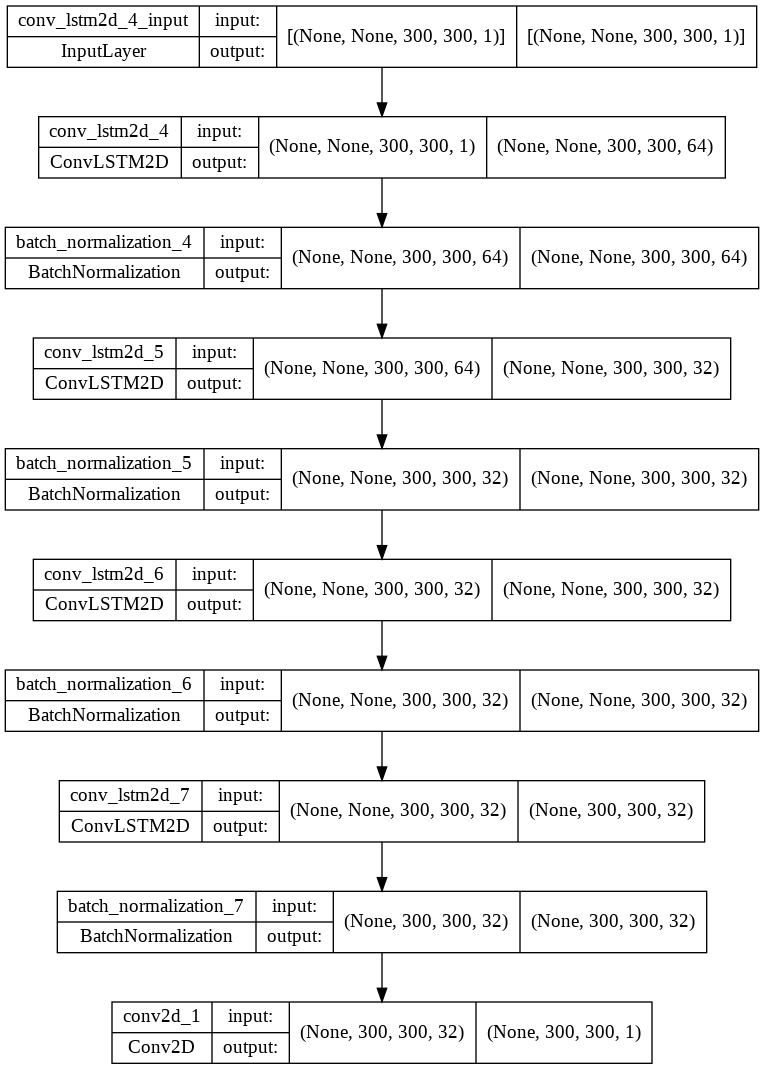

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,
    show_layer_names=True,)

In [ ]:
# model.compile(loss='logcosh', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
model.load_weights('/content/drive/Shareddrives/Datasci/convLSTM_3.h5')

In [ ]:
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(optimizer=tf.keras.optimizers.Adam(lr=3e-4),loss='log_cosh')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='content/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5', 
    verbose=1, 
    save_weights_only=True,
    save_best_only=True,
    save_freq= int(10))

In [ ]:
cb_list = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]

In [ ]:
history = model.fit(x=train_rain_dataset,validation_data=val_rain_dataset,epochs=20,verbose=1,callbacks=cb_list)

Epoch 1/20
4859/4859 [==============================] - 7390s 2s/step - loss: 0.1423 - val_loss: 0.1348
Epoch 2/20
4859/4859 [==============================] - 7377s 2s/step - loss: 0.1343 - val_loss: 0.1348
Epoch 3/20
4859/4859 [==============================] - 7377s 2s/step - loss: 0.1342 - val_loss: 0.1348
Epoch 4/20
4859/4859 [==============================] - 7377s 2s/step - loss: 0.1342 - val_loss: 0.1348
Epoch 5/20
4859/4859 [==============================] - 7382s 2s/step - loss: 0.1342 - val_loss: 0.1348
Epoch 6/20
2487/4859 [==============>...............] - ETA: 54:01 - loss: 0.1337

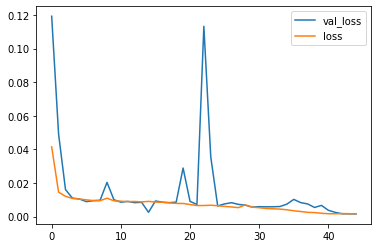

In [ ]:
fig, ax1 = plt.subplots(1,1)
line1, = ax1.plot(history.history["val_loss"],label='val_loss')
line2, = ax1.plot(history.history["loss"],label='loss')
ax1.legend(handles=[line1, line2])
plt.show()

In [ ]:
model.save_weights('/content/drive/Shareddrives/Datasci/convLSTM_4.h5')

# Test model

In [ ]:
test_rain_dataset = RainDataset('/content/bkk_radar_images_all/bkk_radar_images_1','/content/drive/Shareddrives/Datasci/sample_test_image_names.csv',step_in=4,step_out=1,batch_size=1)

1592918492.png is appended
1592918796.png is appended
1592919102.png is appended
1592919700.png is appended
1592919994.png is appended
1592920896.png is appended
1592921192.png is appended
1592921496.png is appended
1592921800.png is appended
1592922094.png is appended
1592922388.png is appended
1592922694.png is appended
1592922998.png is appended
1592923296.png is appended
1592923602.png is appended
1592923896.png is appended
1592924200.png is appended
1592924498.png is appended
1592924802.png is appended
1592925096.png is appended
1592925390.png is appended
1592925694.png is appended
1592925988.png is appended
1592926292.png is appended
1592926596.png is appended
1592926890.png is appended
1592927194.png is appended
1592927500.png is appended
1592927794.png is appended
1592928098.png is appended
1592928392.png is appended
1592928698.png is appended
1592928998.png is appended
1592929294.png is appended
1592929598.png is appended
1592929896.png is appended
1592930190.png is appended
1

In [ ]:
def cal_mse(y,y_red):
  return np.square(np.subtract(y,y_pred)).mean()

In [ ]:
def prediction(model_instance, input_data, lead_time=12):
    
    input_data = data_preprocessing(input_data)
    
    nwcst = []

    for _ in range(lead_time):
        # make prediction
        pred = model_instance.predict(input_data)
        # append prediction to holder
        nwcst.append(pred)
        # append prediction to the input shifted on one step ahead
        input_data = np.concatenate([input_data[::, ::, ::, 1:], pred], axis=-1)
    
    nwcst = data_postprocessing(nwcst)
    
    return nwcst

In [ ]:
def visulize_output(img):
  img = invScaler(img)
  # img = img * 25/5
  # img = np.where(img>0, img, 0)
  plt.imshow(img)
  plt.show()

In [ ]:
X,y = test_rain_dataset[100]


In [ ]:
y_pred = model.predict(X)

In [ ]:
cal_mse(y,y_pred)

1.23179

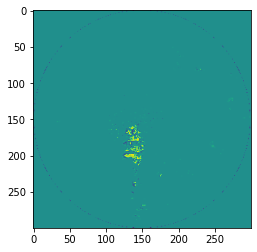

In [ ]:
visulize_output(np.squeeze(y))

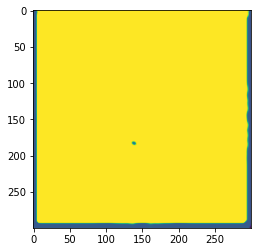

In [ ]:
visulize_output(np.squeeze(y_pred))

In [ ]:
K.clear_session()